<font size="5"><b>Определение перспективного тарифа для телеком-компании</b></font>

Компания «Мегалайн» — федеральный оператор сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

<font size="5"><b>Описание тарифов</b></font>

**Тариф «Смарт»**

1. Ежемесячная плата: 550 рублей
2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета: 1. минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 2. сообщение: 3 рубля; 3. 1 Гб интернет-трафика: 200 рублей.

**Тариф «Ультра»**

1. Ежемесячная плата: 1950 рублей
2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета: 1. минута разговора: 1 рубль; 2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей.


*«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.*

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Общая-информация-о-данных" data-toc-modified-id="Общая-информация-о-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Общая информация о данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Количество-сделанных-звонков-и-израсходованных-минут-разговора-по-месяцам" data-toc-modified-id="Количество-сделанных-звонков-и-израсходованных-минут-разговора-по-месяцам-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Количество сделанных звонков и израсходованных минут разговора по месяцам</a></span></li><li><span><a href="#Количество-отправленных-сообщений-по-месяцам" data-toc-modified-id="Количество-отправленных-сообщений-по-месяцам-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Количество отправленных сообщений по месяцам</a></span></li><li><span><a href="#Объем-израсходованного-интернет-трафика-по-месяцам" data-toc-modified-id="Объем-израсходованного-интернет-трафика-по-месяцам-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Объем израсходованного интернет-трафика по месяцам</a></span></li><li><span><a href="#Помесячная-выручка-с-каждого-пользователя" data-toc-modified-id="Помесячная-выручка-с-каждого-пользователя-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Помесячная выручка с каждого пользователя</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка гипотез</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Общая информация о данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
from scipy import stats as st

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

Рассмотрим подробнее информацию в таблице со звонками.

**Таблица calls (информация о звонках):**
- **id** — уникальный номер звонка
- **call_date** — дата звонка
- **duration** — длительность звонка в минутах
- **user_id** — идентификатор пользователя, сделавшего звонок

In [4]:
calls.sample(5)

,id,call_date,duration,user_id
3807,1010_56,2018-12-21,5.21,1010
183948,1456_420,2018-09-08,17.28,1456
87694,1219_463,2018-05-31,6.21,1219
28751,1072_77,2018-12-06,14.20,1072
135352,1345_161,2018-07-12,7.16,1345


In [5]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [6]:
calls.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


В таблице нет пропущенных значений. 
Стоит изменить типы данных в столбцах id, call_date.
Есть звонки длительностью 0мин 0сек - это пропущенные.

**Таблица internet (информация об интернет-сессиях):**
- **id** — уникальный номер сессии
- **mb_used** — объём потраченного за сессию интернет-трафика (в мегабайтах)
- **session_date** — дата интернет-сессии
- **user_id** — идентификатор пользователя

In [7]:
internet.head(5)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [8]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [9]:
internet.describe()

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


В таблице нет пропущенных значений. Стоит изменить типы данных в столбцах id, session_date. Какой-то странный столбец unnamed, который дублирует нумерацию строк, стоит его удалить.

**Таблица messages (информация о сообщениях):**
- **id** — уникальный номер сообщения
- **message_date** — дата сообщения
- **user_id** — идентификатор пользователя, отправившего сообщение

In [10]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [11]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Стоит изменить тип данных message_date. 

**Таблица tariffs (информация о тарифах):**

- **tariff_name** — название тарифа
- **rub_monthly_fee** — ежемесячная абонентская плата в рублях
- **minutes_included** — количество минут разговора в месяц, включённых в абонентскую плату
- **messages_included** — количество сообщений в месяц, включённых в абонентскую плату
- **mb_per_month_included** — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- **rub_per_minute** — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- **rub_per_message** — стоимость отправки сообщения сверх тарифного пакета
- **rub_per_gb** — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

In [12]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [13]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


С таблицей tariffs все в порядке.

**Таблица users (информация о пользователях):**

- **user_id** — уникальный идентификатор пользователя
- **first_name** — имя пользователя
- **last_name** — фамилия пользователя
- **age** — возраст пользователя (годы)
- **reg_date** — дата подключения тарифа (день, месяц, год)
- **churn_date** — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- **city** — город проживания пользователя
- **tarif** — название тарифного плана

In [14]:
users.sample(5)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
267,1267,63,NaN,Екатеринбург,Яна,Седова,2018-08-05,smart
317,1317,45,NaN,Москва,Всеволод,Зыков,2018-07-09,smart
361,1361,38,NaN,Екатеринбург,Рената,Кошелева,2018-09-09,ultra
223,1223,20,NaN,Стерлитамак,Алан,Панфилов,2018-12-12,smart
134,1134,65,NaN,Красноярск,Марьяна,Авросимова,2018-01-16,smart


In [15]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [16]:
users.describe()

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


Стоит изменить тип данных у столбцов churn_date, reg_date. Пропуски в churn_date связаны с тем, что пользователи не прекратили использовать тариф.

## Предобработка данных

In [17]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format="%Y-%m-%d")

internet['session_date'] = pd.to_datetime(internet['session_date'], format="%Y-%m-%d")

messages['message_date'] = pd.to_datetime(messages['message_date'], format="%Y-%m-%d")

users['churn_date'] = pd.to_datetime(users['churn_date'], format="%Y-%m-%d")
users['reg_date'] = pd.to_datetime(users['reg_date'], format="%Y-%m-%d")

In [18]:
#удаляем ненужный столбец Unnamed: 0
internet = internet.drop(['Unnamed: 0'], axis=1)

In [19]:
#округляем продолжительность звонков большую сторону и приводим к целочисленному типу, по скольку 
#Мегалайн округляет секунды до минут в большую сторону
calls['duration'] = calls['duration'].apply(np.ceil).astype('int')

In [20]:
#удалим строки с пропущенными звонками и строки неиспользованными мегабайтами
calls.drop(calls[calls['duration']==0].index, inplace=True)
internet.drop(internet[internet['mb_used']==0].index, inplace=True)

### Количество сделанных звонков и израсходованных минут разговора по месяцам

In [21]:
calls['month'] = calls['call_date'].dt.month_name()

calls_group = calls.groupby(['user_id', 'month']).agg({'duration':'sum', 'id':'count'}).reset_index()
calls_group = calls_group.rename(columns={'duration':'sum_duration_calls','id':'count_calls'})

calls_group.sample(5)

,user_id,month,sum_duration_calls,count_calls
412,1065,August,573,65
2084,1333,December,697,79
2587,1409,December,667,76
1692,1272,September,294,27
1502,1240,September,523,51


### Количество отправленных сообщений по месяцам

In [22]:
messages['month'] = messages['message_date'].dt.month_name()

messages_group = messages.groupby(['user_id', 'month']).agg({'id':'count'}).reset_index()
messages_group = messages_group.rename(columns={'id':'count_messages'})

messages_group.sample(5)

,user_id,month,count_messages
1301,1251,October,99
1523,1295,September,32
1219,1237,November,99
2496,1460,September,45
1163,1222,August,4


### Объем израсходованного интернет-трафика по месяцам

In [23]:
internet['month'] = internet['session_date'].dt.month_name()
internet_group = internet.groupby(['user_id', 'month']).agg({'mb_used':'sum'}).reset_index()
internet_group = internet_group.rename(columns={'mb_used':'sum_mb_used'})
internet_group['sum_gb_used']=(internet_group['sum_mb_used']/1024).apply(np.ceil)
internet_group.sample(5)

,user_id,month,sum_mb_used,sum_gb_used
1222,1189,July,18147.15,18.0
369,1057,September,20647.81,21.0
2927,1458,August,13981.20,14.0
2537,1396,June,12099.84,12.0
565,1089,October,20861.14,21.0


In [24]:
#округлили верно
internet_group.query('sum_mb_used > 1000').sort_values(by='sum_mb_used').head()

,user_id,month,sum_mb_used,sum_gb_used
2259,1359,July,1009.93,1.0
2377,1377,April,1151.05,2.0
1232,1191,June,1160.40,2.0
2979,1466,February,1162.99,2.0
1233,1191,October,1175.74,2.0


### Помесячная выручка с каждого пользователя

In [25]:
df = calls_group.merge(messages_group, on=['user_id','month'], how='outer').merge(internet_group, on=['user_id','month'], 
                                                                                 how = 'outer')
df.sample(5)

,user_id,month,sum_duration_calls,count_calls,count_messages,sum_mb_used,sum_gb_used
1722,1277,August,185.0,23.0,131.0,23932.62,24.0
1950,1312,December,474.0,54.0,29.0,21860.02,22.0
710,1114,July,80.0,10.0,NaN,1893.15,2.0
2026,1324,November,535.0,64.0,124.0,21252.03,21.0
984,1157,May,448.0,51.0,NaN,21915.28,22.0


In [26]:
df = df.merge(users, on='user_id', how='left')
df.sample(5)

,user_id,month,sum_duration_calls,count_calls,count_messages,sum_mb_used,sum_gb_used,age,churn_date,city,first_name,last_name,reg_date,tariff
2462,1391,November,669.0,74.0,3.0,27488.39,27.0,47,NaT,Стерлитамак,Герасим,Аркадьев,2018-05-12,ultra
2414,1384,August,682.0,74.0,1.0,17428.77,18.0,42,NaT,Нижний Новгород,Кристина,Касьянова,2018-04-27,smart
2793,1437,September,174.0,23.0,23.0,24141.40,24.0,73,NaT,Казань,Лилия,Селезнева,2018-08-03,smart
2799,1439,July,329.0,43.0,5.0,20039.64,20.0,62,NaT,Орёл,Евгения,Афонина,2018-06-30,smart
109,1015,August,394.0,41.0,68.0,27401.42,27.0,26,NaT,Челябинск,Рузана,Алюшина,2018-04-30,smart


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 14 columns):
user_id               3214 non-null int64
month                 3214 non-null object
sum_duration_calls    3168 non-null float64
count_calls           3168 non-null float64
count_messages        2717 non-null float64
sum_mb_used           3201 non-null float64
sum_gb_used           3201 non-null float64
age                   3214 non-null int64
churn_date            187 non-null datetime64[ns]
city                  3214 non-null object
first_name            3214 non-null object
last_name             3214 non-null object
reg_date              3214 non-null datetime64[ns]
tariff                3214 non-null object
dtypes: datetime64[ns](2), float64(5), int64(2), object(5)
memory usage: 376.6+ KB


In [28]:
df.isna().sum()

user_id                  0
month                    0
sum_duration_calls      46
count_calls             46
count_messages         497
sum_mb_used             13
sum_gb_used             13
age                      0
churn_date            3027
city                     0
first_name               0
last_name                0
reg_date                 0
tariff                   0
dtype: int64

In [29]:
df['sum_duration_calls'] = df['sum_duration_calls'].fillna(0)
df['count_calls'] = df['count_calls'].fillna(0)
df['count_messages'] = df['count_messages'].fillna(0)
df['sum_mb_used'] = df['sum_mb_used'].fillna(0)
df['sum_gb_used'] = df['sum_gb_used'].fillna(0)

In [30]:
#сделаем полную таблицу
tariffs=tariffs.rename(columns={"tariff_name" : "tariff"})
df = df.merge(tariffs, on='tariff', how='left')
df.sample(5)

,user_id,month,sum_duration_calls,count_calls,count_messages,sum_mb_used,sum_gb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
132,1018,May,507.0,61.0,30.0,5042.33,5.0,71,NaT,Уфа,Матвей,Золотов,2018-04-01,ultra,1000,30720,3000,1950,150,1,1
703,1113,March,530.0,63.0,43.0,17208.37,17.0,52,NaT,Чита,Харитон,Булгаков,2018-01-24,smart,50,15360,500,550,200,3,3
764,1121,June,584.0,62.0,50.0,15748.82,16.0,62,NaT,Белгород,Марта,Афанасова,2018-05-04,smart,50,15360,500,550,200,3,3
983,1157,March,322.0,39.0,0.0,15895.47,16.0,27,NaT,Москва,Виктория,Белоусова,2018-02-23,smart,50,15360,500,550,200,3,3
343,1055,December,597.0,65.0,39.0,22832.59,23.0,39,NaT,Казань,Луиза,Березина,2018-01-02,smart,50,15360,500,550,200,3,3


In [31]:
#Вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножем на значение из 
#тарифного плана; прибавим абонентскую плату, соответствующую тарифному плану.

def above_used_tariff(data):
    messages_above = (data['count_messages'] - data['messages_included']) * data['rub_per_message']
    minutes_above = (data['sum_duration_calls'] - data['minutes_included']) * data['rub_per_minute']
    gb_above = int(data['sum_gb_used'] - (data['mb_per_month_included']/1024)) * data['rub_per_gb'] 
    t = 0
    for i in [messages_above, minutes_above, gb_above]:
        if i > 0:
            t += i
    return t

In [32]:
df['above_used_tariff'] = df.apply(lambda x: above_used_tariff(x), axis=1)
df['total_paid'] = df['rub_monthly_fee'] + df['above_used_tariff']
df.sample(5)

,user_id,month,sum_duration_calls,count_calls,count_messages,sum_mb_used,sum_gb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,above_used_tariff,total_paid
1810,1291,April,550.0,73.0,0.0,14467.90,15.0,73,NaT,Москва,Мануэла,Анищенко,2018-02-08,smart,50,15360,500,550,200,3,3,150.0,700.0
1331,1210,October,602.0,65.0,0.0,21818.17,22.0,33,NaT,Севастополь,Евфросинья,Серебрякова,2018-07-29,smart,50,15360,500,550,200,3,3,1706.0,2256.0
2200,1354,August,148.0,15.0,39.0,7084.09,7.0,56,NaT,Сочи,Лола,Кулагина,2018-08-19,smart,50,15360,500,550,200,3,3,0.0,550.0
2820,1444,December,631.0,78.0,63.0,20178.18,20.0,35,NaT,Нижний Новгород,Иулиан,Воронин,2018-11-07,smart,50,15360,500,550,200,3,3,1432.0,1982.0
898,1145,May,508.0,56.0,103.0,17264.97,17.0,45,NaT,Тюмень,Юлий,Алешин,2018-04-11,smart,50,15360,500,550,200,3,3,583.0,1133.0


In [33]:
#добавим в таблицу отдельно столбцы с превышением сообщений, минут и Гб.
df['messages_above_tariff'] = np.where((df['count_messages'] - df['messages_included']) > 0,
                                       df['count_messages'] - df['messages_included'], 0)
df['minutes_above_tariff'] = np.where((df['sum_duration_calls'] - df['minutes_included']) > 0,
                                       df['sum_duration_calls'] - df['minutes_included'], 0)

df['gb_above_tariff'] = np.where((df['sum_gb_used'] - (df['mb_per_month_included']/1024)) > 0,
                                       df['sum_gb_used'] - (df['mb_per_month_included']/1024), 0)
    
df.sample(5)



,user_id,month,sum_duration_calls,count_calls,count_messages,sum_mb_used,sum_gb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,above_used_tariff,total_paid,messages_above_tariff,minutes_above_tariff,gb_above_tariff
2636,1416,November,861.0,107.0,89.0,19368.45,19.0,50,2018-12-14,Санкт-Петербург,Валерия,Ёлчина,2018-07-16,ultra,1000,30720,3000,1950,150,1,1,0.0,1950.0,0.0,0.0,0.0
2063,1330,May,665.0,71.0,61.0,29374.15,29.0,65,NaT,Нижний Новгород,Изольда,Алфимова,2018-02-02,ultra,1000,30720,3000,1950,150,1,1,0.0,1950.0,0.0,0.0,0.0
1739,1280,December,479.0,68.0,51.0,19787.05,20.0,53,NaT,Астрахань,Артемий,Худяков,2018-07-18,smart,50,15360,500,550,200,3,3,1003.0,1553.0,1.0,0.0,5.0
1108,1176,July,353.0,35.0,64.0,16378.19,16.0,37,NaT,Волгоград,Радим,Куприянов,2018-01-20,smart,50,15360,500,550,200,3,3,242.0,792.0,14.0,0.0,1.0
776,1123,March,234.0,24.0,6.0,7659.09,8.0,74,NaT,Краснодар,Вениамин,Устинов,2018-03-18,smart,50,15360,500,550,200,3,3,0.0,550.0,0.0,0.0,0.0


## Анализ данных

In [34]:
smart = df[df['tariff'] == 'smart']
ultra = df[df['tariff'] == 'ultra']
s_minutes = smart['sum_duration_calls']
u_minutes = ultra['sum_duration_calls']

print('Тариф Смарт')
print()
print('Среднее количество потраченных минут:', s_minutes.mean().round(2))
print('Дисперсия минут:', np.var(s_minutes, ddof=1).round(2))
print('Стандартное отклонение по минутам:', np.std(s_minutes).round(2))
print('---------------------------------------------')
print('Тариф Ультра')
print()
print('Среднее количество потраченных минут:', u_minutes.mean().round(2))
print('Дисперсия минут:', np.var(u_minutes, ddof=1).round(2))
print('Стандартное отклонение по минутам:', np.std(u_minutes).round(2))

Тариф Смарт

Среднее количество потраченных минут: 417.93
Дисперсия минут: 36219.32
Стандартное отклонение по минутам: 190.27
---------------------------------------------
Тариф Ультра

Среднее количество потраченных минут: 526.62
Дисперсия минут: 100873.63
Стандартное отклонение по минутам: 317.44


In [35]:
def func_hist(df1, df2, title, xlabel, ylabel):
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    df1.hist(label='Тариф "Смарт"')
    df2.hist(alpha=0.5, label='Тариф "Ультра"')
    plt.legend(loc='best')
    plt.show()
    

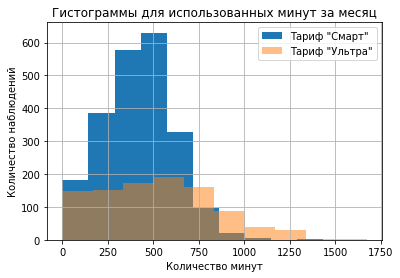

In [36]:
func_hist(s_minutes, u_minutes, 'Гистограммы для использованных минут за месяц', 'Количество минут', 'Количество наблюдений')

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

Кстати, если тебе поднадоел стандартный `matplotlib`, попробуй пострить графики с помощью [plotly](https://plotly.github.io/plotly.py-docs/generated/plotly.express.histogram.html)

При тарифе "Ультра" большинство пользователей не расходуют заявленное количество минут. В тарифе "Смарт" минуты расходуются либо с доплатой, либо с небольшим запасом минут.

In [37]:
s_messages = smart['count_messages']
u_messages = ultra['count_messages']

print('Тариф Смарт')
print()
print('Среднее количество сообщений:', s_messages.mean().round(2))
print('Дисперсия сообщений:', np.var(s_messages, ddof=1).round(2))
print('Стандартное отклонение по сообщениям:', np.std(s_messages).round(2))
print('---------------------------------------------')
print('Тариф Ультра')
print()
print('Среднее количество сообщений:', u_messages.mean().round(2))
print('Дисперсия сообщений:', np.var(u_messages, ddof=1).round(2))
print('Стандартное отклонение по сообщениям:', np.std(u_messages).round(2))

Тариф Смарт

Среднее количество сообщений: 33.38
Дисперсия сообщений: 796.81
Стандартное отклонение по сообщениям: 28.22
---------------------------------------------
Тариф Ультра

Среднее количество сообщений: 49.36
Дисперсия сообщений: 2285.27
Стандартное отклонение по сообщениям: 47.78


In [38]:
df.pivot_table(index='tariff',  
                 values=['sum_duration_calls', 'sum_mb_used', 'count_messages'], 
                 aggfunc=['mean', 'std', 'var']).T.style.format('{:.2f}')

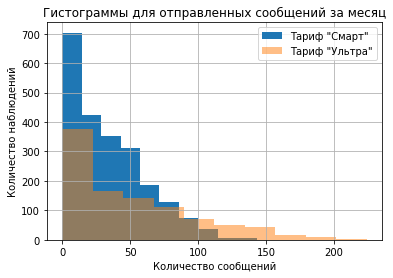

In [39]:
func_hist(s_messages, u_messages, 'Гистограммы для отправленных сообщений за месяц', 'Количество сообщений',
          'Количество наблюдений')

Сообщения для обоих тарифов не являются показательными, люди все чаще пользуются мессенджерами, однако некоторые пользователи тарифа "Смарт" переплачивают за сообщения.

In [40]:
s_internet = smart['sum_mb_used']
u_internet = ultra['sum_mb_used']

print('Тариф Смарт')
print()
print('Среднее количество использованных мегабайт:', s_internet.mean().round(2))
print('Дисперсия количества мегабайт:', np.var(s_internet, ddof =1).round(2))
print('Стандартное отклонение по количеству мегабайт:', np.std(s_internet).round(2))
print('---------------------------------------------')
print('Тариф Ультра')
print()
print('Среднее количество использованных мегабайт:', u_internet.mean().round(2))
print('Дисперсия количества мегабайт:', np.var(u_internet, ddof =1).round(2))
print('Стандартное отклонение по количеству мегабайт:', np.std(u_internet).round(2))

Тариф Смарт

Среднее количество использованных мегабайт: 16208.39
Дисперсия количества мегабайт: 34462496.46
Стандартное отклонение по количеству мегабайт: 5869.16
---------------------------------------------
Тариф Ультра

Среднее количество использованных мегабайт: 19468.81
Дисперсия количества мегабайт: 101751013.78
Стандартное отклонение по количеству мегабайт: 10082.05


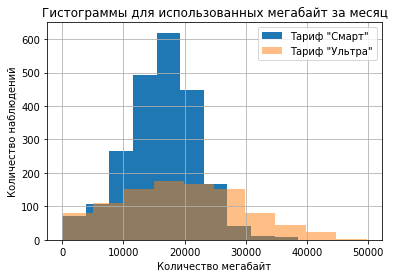

In [41]:
func_hist(s_internet, u_internet, 'Гистограммы для использованных мегабайт за месяц', 'Количество мегабайт',
          'Количество наблюдений')

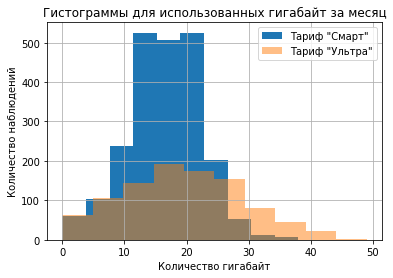

In [42]:
#построим также гистограммы для гигабайтов
s_internet2 = smart['sum_gb_used']
u_internet2 = ultra['sum_gb_used']
func_hist(s_internet2, u_internet2, 'Гистограммы для использованных гигабайт за месяц', 'Количество гигабайт',
          'Количество наблюдений')

Заметно, что клиенты активно используют интернет. Наиболее заметны переплаты за тариф "Смарт", но также и на "Ультра".

Гистограммы для использования интернета и для израсходованных минут имею нормальное распределение.

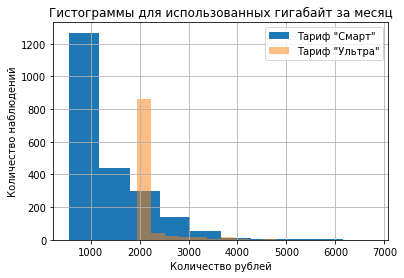

In [43]:
#посмотрим кто больше переплачивает
s_total_paid = smart['total_paid']
u_total_paid = ultra['total_paid']
func_hist(s_total_paid, u_total_paid, 'Гистограммы для использованных гигабайт за месяц', 'Количество рублей',
          'Количество наблюдений')

Предварительно можно сказать, что многие считают, что выгоднее сидеть на "Смарте" и переплачивать, нежели чем сразу платить почти в 4 раза больше. Проверим это ниже.

## Проверка гипотез

Сформулируем первую нулевую гипотезу:
- H0: средняя выручка пользователей тарифов «Ультра» и «Смарт» не различаются
- H1: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

In [44]:
smart_total_paid = smart['total_paid']
ultra_total_paid = ultra['total_paid']


alpha = 0.05 
results = st.ttest_ind(smart_total_paid, ultra_total_paid)


print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.4229814360764067e-160
Отвергаем нулевую гипотезу


Сформулируем вторую нулевую гипотезу:
- H0: средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов
- H1: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

In [45]:
moscow = df.loc[df['city'] == 'Москва']['total_paid']
other = df.loc[df['city'] != 'Москва']['total_paid']

alpha = 0.05
results = st.ttest_ind(moscow, other)


print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5440152911670224
Не получилось отвергнуть нулевую гипотезу


## Общий вывод

В ходе работы над проектом была проведена предобработка данных: данные приведены к нужным типам, удалены лишние столбцы, удалены строки с нулевыми значениями. Посчитано:
- Количество сделанных звонков и израсходованных минут разговора по месяцам
- Количество отправленных сообщений по месяцам
- Количество отправленных сообщений по месяцам
- Помесячная выручка с каждого пользователя


Был проведен анализ данных:
- Посчитано среднее количество, дисперсия и стандартное отклонение израсходованных минут, отправленных сообщений и использованных мегабайт интернета
- Построены гистограммы для использованных показателей тарифов, а также гистограмма, где показано количество переплаченных денег за тарифы


Проверены гипотезы:
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различается
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов


На обоих тарифах неактивно используются смс-сообщения. Пользователи тарифа "Смарт" часто выходят за рамки указанных единиц тарифа и переплачивают за минуты и интернет, пользователи тарифа "Ультра" делают это гораздо реже.

Для пользователей выгоднее выбирать тариф "Смарт" и платить за минуты и интернет вне трафика. Для оператора, конечно, более выгоден тариф "Ультра", клиенты платят больше и редко когда расходуют полный пакет. Стоит проанализировать из-за чего клиенты отказываются от оператора "Мегалайн" и какие условия у конкурентов, на основе этого сделать вывод, стоит ли как-то координально трансформировать или добавлять тарифы. 
Так как не удалось отвергнуть вторую гипотезу, можно спрогнозировать отток клиентов при появлении более выгодного тарифа у конкурентов. Стоит изменить ценообразование по регионам, так как финансирование страны более централизовано, и в регионах люди получают меньше. 
Тут замечается психология людей, при большем заработке люди меньше радуются мелочам. Именно поэтому стоит рассмотреть изменение цен по регионам.